---
---

# **1 - Sonar Data Set**

### **Detecting a Rock or a Mine**

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.


The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 


Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies (analyzing sonar frequencies to help distinguish between rocks or sea mines).


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Classification/Rock_or_Mine_Classification/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,Freq_11,Freq_12,Freq_13,Freq_14,Freq_15,Freq_16,Freq_17,Freq_18,Freq_19,Freq_20,Freq_21,Freq_22,Freq_23,Freq_24,Freq_25,Freq_26,Freq_27,Freq_28,Freq_29,Freq_30,Freq_31,Freq_32,Freq_33,Freq_34,Freq_35,Freq_36,Freq_37,Freq_38,Freq_39,Freq_40,Freq_41,Freq_42,Freq_43,Freq_44,Freq_45,Freq_46,Freq_47,Freq_48,Freq_49,Freq_50,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

---
---

# 2 - Exploratory Data Analysis and Visualization



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

No missing value

---

## A. Label Distribution

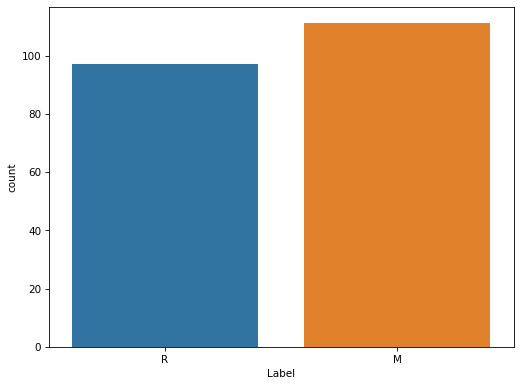

In [6]:
plt.figure(figsize=(8,6), dpi=75)
sns.countplot(data=df, x='Label');

In [7]:
df['Label'].value_counts()

M    111
R     97
Name: Label, dtype: int64

The label has near balanced distribution

---

## **B. Features Correlation**



### **a. Mapping Label**

In [8]:
# Mapping the Label -> Rock (R) is 0, Mine (M) is 1, 
df['Target'] = df['Label'].map({'R':1, 'M':0})

In [9]:
# Rename Column 'Label' to 'Target'
#df = df.rename(columns={'Label':'Target'})

In [10]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,Freq_11,Freq_12,Freq_13,Freq_14,Freq_15,Freq_16,Freq_17,Freq_18,Freq_19,Freq_20,Freq_21,Freq_22,Freq_23,Freq_24,Freq_25,Freq_26,Freq_27,Freq_28,Freq_29,Freq_30,Freq_31,Freq_32,Freq_33,Freq_34,Freq_35,Freq_36,Freq_37,Freq_38,Freq_39,Freq_40,Freq_41,Freq_42,Freq_43,Freq_44,Freq_45,Freq_46,Freq_47,Freq_48,Freq_49,Freq_50,Freq_51,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1


In [11]:
df['Target'].unique()

array([1, 0])

**Create a heatmap of the correlation between the difference frequency responses.**

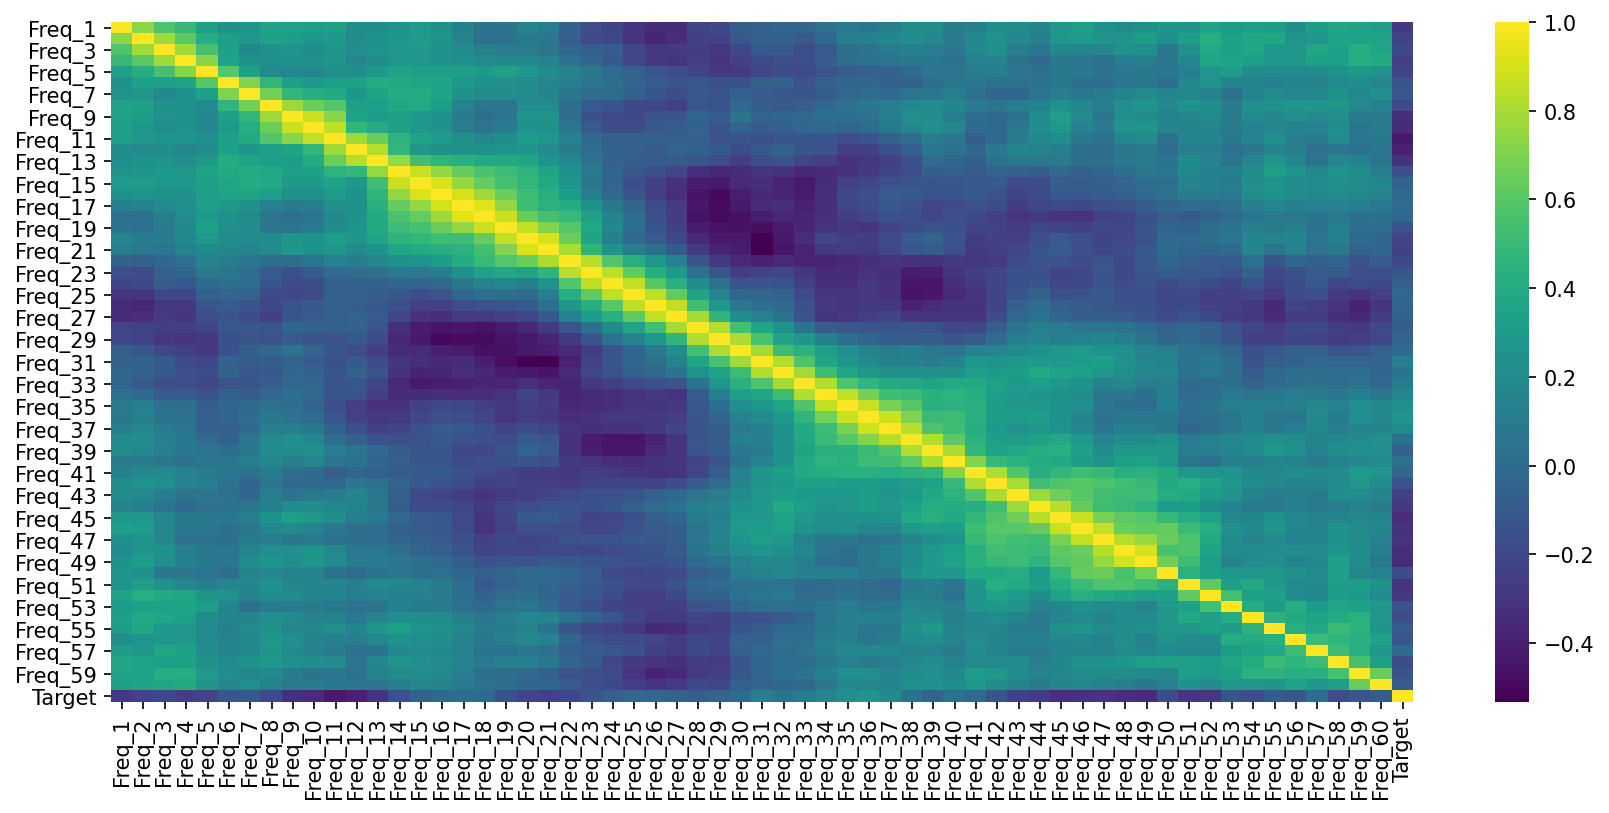

In [12]:
plt.figure(figsize=(14,6),dpi=150)
sns.heatmap(df.corr(), cmap='viridis');

Based on Image above, the darker color has likelihood to detect Mine

**What are the top 5 positive correlated frequencies with the target\label?**

In [13]:
df.corr()['Target'].sort_values().tail(6)

Freq_31    0.110728
Freq_34    0.172010
Freq_37    0.209055
Freq_35    0.227670
Freq_36    0.269151
Target     1.000000
Name: Target, dtype: float64

Five frequencies that has better detection of Rock

**What are the top 5 negative correlated frequencies with the target\label?**

In [14]:
df.corr()['Target'].sort_values().head(5)

Freq_11   -0.432855
Freq_12   -0.392245
Freq_49   -0.351312
Freq_10   -0.341142
Freq_45   -0.339406
Name: Target, dtype: float64

Five frequencies that has better detection of Mine

### **b. Plot KNN Decision Boundary**

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

def plot_knn_boundary(n_neighbors, x, y, legend, data):
  # Create color maps
  cmap_light = ListedColormap(['cornflowerblue','orange']) #warna untuk color meshgrid
  cmap_bold = ['darkblue','darkorange'] #warna untuk sns scatter plot

  X = np.array(data[x]) # x-axis
  Y = np.array(data[y]) # y-axis
  h = 0.01  # step size in the mesh(semakin kecil -> semakin smooth boundary nya)


  #instance of Neighbours Classifier and fit the data.
  knn = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn.fit(df[[x,y]], df[legend]) # train on features 1 and 2 for predict plot contour

  # Plot the decision boundary (batas-batas grafik mesh)
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X.min() - .01, X.max() + .01
  y_min, y_max = Y.min() - .01, Y.max() + .01
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  print(xx.shape)
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  print(Z.shape)
  plt.figure(figsize=(10,5),dpi=100)
  plt.contourf(xx, yy, Z, cmap=cmap_light)
    
  # Plot the test data
  sns.scatterplot(x=x, y=y, hue=legend, data=data,
                  palette=cmap_bold, edgecolor="black", alpha=0.8)
    
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.title(f'K-Nearest Neighbors Decision Boundaries (K:{n_neighbors})')
  plt.xlabel(x)
  plt.ylabel(y);

(102, 73)
(102, 73)


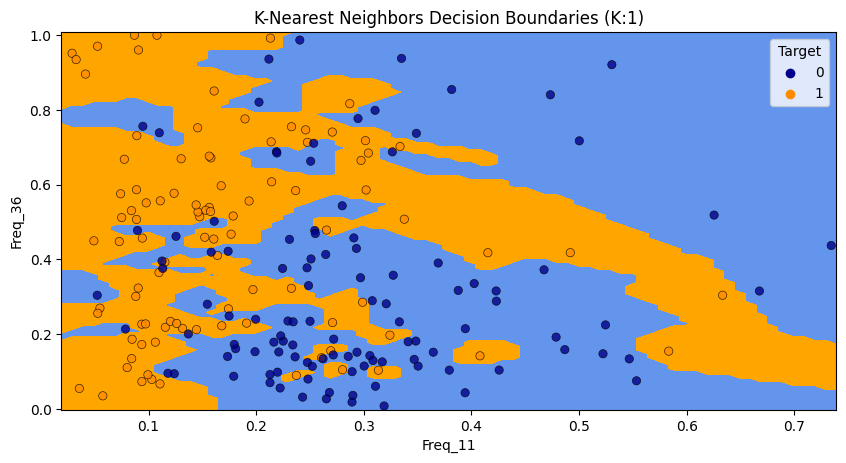

In [16]:
plot_knn_boundary(1, x='Freq_11', y='Freq_36', legend='Target', data=df)

---

---
---

# 3 - K-Nearest Neighbors

## **A. Setup**

### **a. Train | Test Split**

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

In [17]:
X = df.drop(['Label','Target'], axis=1)
y = df['Label']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [20]:
X_train.shape

(187, 60)

In [21]:
X_test.shape

(21, 60)

---

### b. Standardization Instance

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

---

## B. **Create Estimator/Model**

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier()

---

### **a. Pipeline**

**Create a PipeLine that contains both a StandardScaler and a KNN model**

A Pipeline object in Scikit-Learn can set up a sequence of repeated operations, such as a scaler and a model. This way only the pipeline needs to be called, instead of having repeatedly call a scaler and a model.

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
operations = [('scaler', scaler), 
              ('knn', knn)]

In [28]:
pipe = Pipeline(operations)

---

### **b. Grid Search for Best Hyper-Parameters**

**Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
k_values = list(range(1,30))

param_grid = {'knn__n_neighbors': k_values}

In [31]:
grid_knn_pipe = GridSearchCV(pipe, 
                            param_grid=param_grid, 
                            cv=5, 
                            scoring='accuracy')

---

### **c. Fit/Train Model**

In [32]:
# Dont use scaled data because the pipe will do the scaling
grid_knn_pipe.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
           

---

### **d. Coefficients/Parameters**

In [33]:
grid_knn_pipe.best_estimator_.get_params()

{'knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                      weights='uniform'),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'memory': None,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                        weights='uniform'))],
 'verbose': False}

In [34]:
grid_knn_pipe.best_params_

{'knn__n_neighbors': 1}

**Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [35]:
grid_knn_pipe.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

In [36]:
accuracy_score = grid_knn_pipe.cv_results_['mean_test_score']

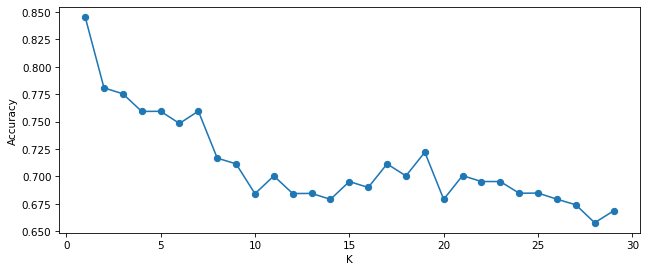

In [37]:
plt.figure(figsize=(10,4),dpi=75)
plt.plot(range(1,30), accuracy_score, marker='o')
plt.ylabel('Accuracy')
plt.xlabel('K');

---

## **C. Performance Evaluation**

**Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

### **a. Classification Metrics on Test Set**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [39]:
y_pred = grid_knn_pipe.predict(X_test)

In [40]:
confusion_matrix(y_test, y_pred)

array([[12,  1],
       [ 1,  7]])

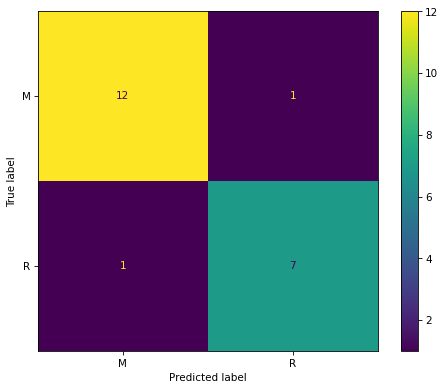

In [41]:
fig, ax = plt.subplots(figsize=(8,6), dpi=75)
plot_confusion_matrix(grid_knn_pipe, X_test, y_test, ax=ax);

This is a good model, but beware of the False Negative that predict a Mine as Rock. So its need Human/Robot Inspector to check vicinity area when the model is predicted R

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



---

### **b. Performance Curves**

**Create both the precision recall curve and the ROC Curve.**

In [43]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

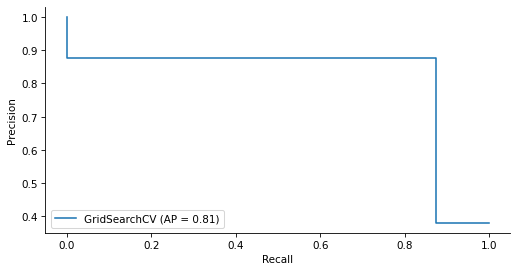

In [44]:
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_precision_recall_curve(grid_knn_pipe, X_test, y_test, ax=ax)
sns.despine() # Remove border from graph
plt.show()

The optimum Recall vs Precision is at 0.89 each precision and recall

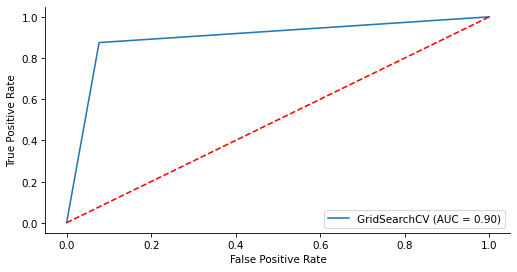

In [45]:
fig, ax = plt.subplots(figsize=(8,4), dpi=75)
plot_roc_curve(grid_knn_pipe, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--')
sns.despine()
plt.show()

The optimum value of TPR vs FPR 

---
---



# **4 - Finalize Model**

## **A. Re-Train/Fit Model on All Data**

**NOTE: If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model).**

**Using best estimators from Grid Search, we Re-Train all data:**

In [46]:
scaler = StandardScaler()

# Using Best Parameter from Grid Search
knn1 = KNeighborsClassifier(n_neighbors=1)
operations = [('scaler', scaler), 
              ('knn1', knn1)]

In [47]:
final_model_pipe = Pipeline(operations)

In [48]:
final_model_pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn1',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)

In [49]:
y_test.iloc[4]

'M'

In [50]:
final_model_pipe.predict(X_test.iloc[4].values.reshape(1, -1)) # Reshape to 2D array and predict

array(['M'], dtype=object)

In [51]:
final_model_pipe.classes_

array(['M', 'R'], dtype=object)

In [52]:
final_model_pipe.predict_proba(X_test.iloc[4].values.reshape(1, -1))

array([[1., 0.]])

---

## **B. Saving the Model**

In [53]:
from joblib import dump

In [54]:
dump(final_model_pipe, '/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Classification/Rock_or_Mine_Classification/rock_or_mine_knn_pipeline.joblib') 

['/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Classification/Rock_or_Mine_Classification/rock_or_mine_knn_pipeline.joblib']

---
---